# Python Notebook: Problem Sheet 2 

### Q6 - Wine Dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalise the data
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
# Load wine data
(X,y) = load_wine(return_X_y = True, as_frame = True)
Xy = pd.concat([X, y], axis=1)

In [10]:
(n, p) = X.shape # number of examples and dimension of each example
K = y.unique().size # number of classes
print('n=', n, ', p=', p, ', K=', K)
X.head()

n= 178 , p= 13 , K= 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<Figure size 432x288 with 0 Axes>

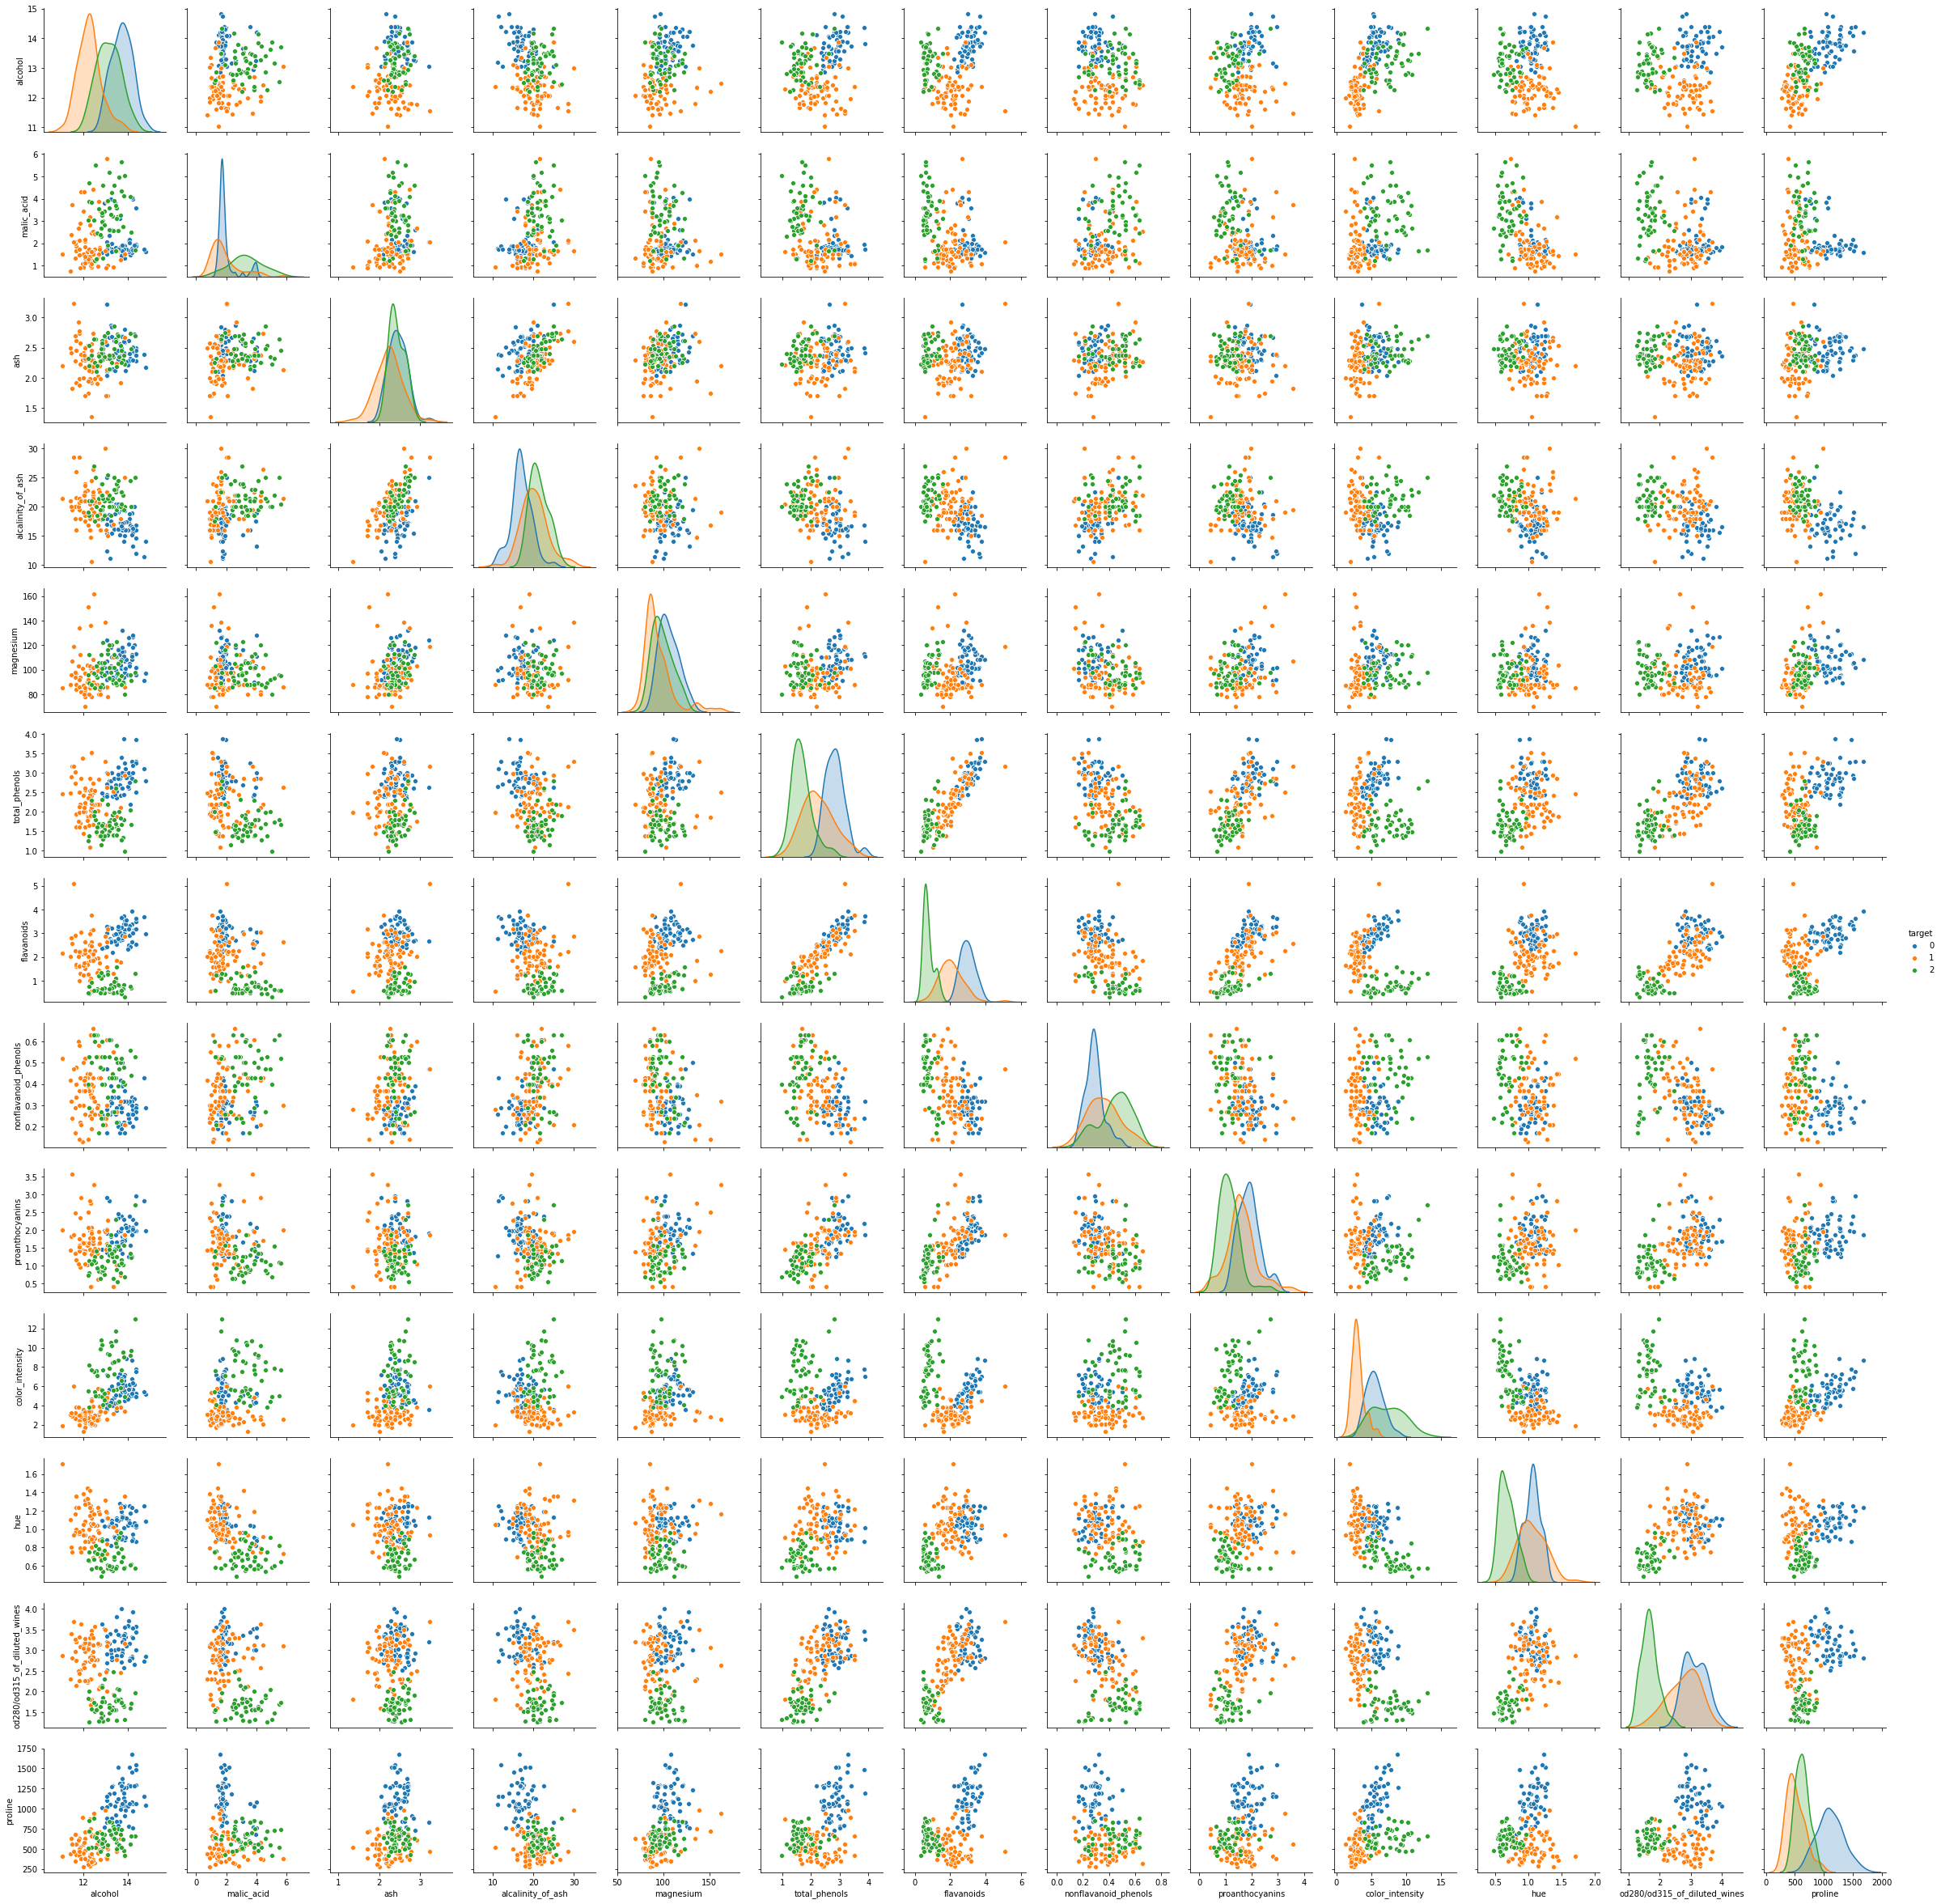

In [4]:
# Pairplot of the variables
plt.figure()
sns.pairplot(data = Xy, hue ='target')

In [11]:
# Normalise the data (so that the values b_{kj} are on the same scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# LDA
ldaclf = LinearDiscriminantAnalysis(store_covariance=True)
ldaclf.fit(X_scaled, y) # Train LDA

# lda.score returns the accuracy, that is 1-misclassification error=1-Risk
R_train = 1-ldaclf.score(X_scaled, y)
print('Training risk: ', R_train)

Training risk:  0.0


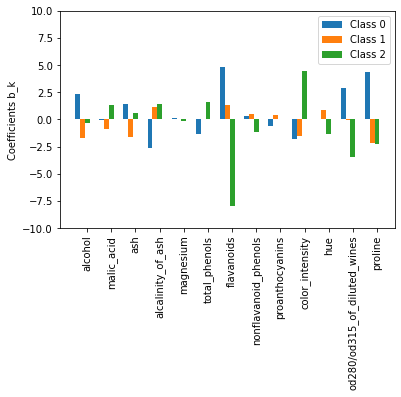

In [15]:
# Visualise the coefficients b_{kj} for k=0..3, j=0..12
width = 0.2
plt.figure()
for k in np.arange(3):    
    plt.bar(np.arange(0,13)+width*k,ldaclf.coef_[k,:], tick_label=X.keys(), width=width)
    plt.xticks(rotation='vertical')
    plt.ylim([-10,10])
    plt.ylabel('Coefficients b_k')    
plt.legend(['Class 0', 'Class 1', 'Class 2']);

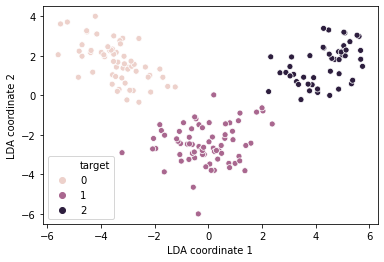

In [16]:
# Compute discriminant coordinates
Z = ldaclf.transform(X_scaled) 

# Plot data in discriminant coordinates
plt.figure()
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=y)
plt.xlabel('LDA coordinate 1')
plt.ylabel('LDA coordinate 2');

### Q7 - Digits Dataset

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits   
from sklearn.model_selection import train_test_split

In [18]:
# Load data
(X, y) = load_digits(return_X_y=True, as_frame=True, n_class = 10)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


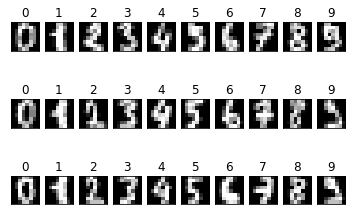

In [19]:
# Plot some images in the dataset
for i in range(30):
    plt.subplot(3, 10, i + 1)
    image = X.loc[i,:].to_numpy()    
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title(y[i])
    plt.xticks(())
    plt.yticks(())

In [20]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print('Training:', X_train.shape)
print('Test:', X_test.shape)

Training: (898, 64)
Test: (899, 64)


### Linear Discriminant Analysis

In [21]:
LDAclf_digit = LinearDiscriminantAnalysis()
LDAclf_digit.fit(X_train, y_train)

accuracy_training = LDAclf_digit.score(X_train,y_train)
accuracy_test = LDAclf_digit.score(X_test,y_test)
print('Accuracy on Training Set: ', accuracy_training)
print('Accuracy on Test Set: ', accuracy_test)

Accuracy on Training Set:  0.967706013363029
Accuracy on Test Set:  0.9521690767519466


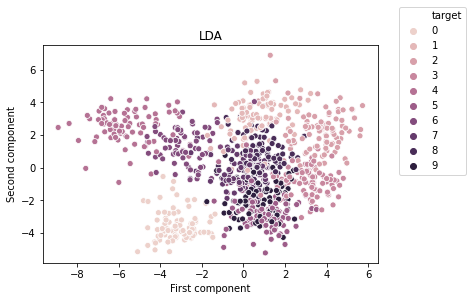

In [22]:
# Show discriminant coordinates in 2D
Z_lda = LDAclf_digit.transform(X_train)

plt.figure()
sns.scatterplot(x=Z_lda[:,0], y=Z_lda[:,1],
                hue= y_train, hue_order=y.unique(), legend='full')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('LDA')
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left');

### PCA (for comparison of latent representations)

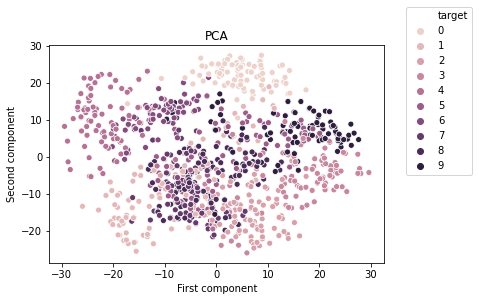

In [23]:
pca = PCA(n_components=2)
Z_pca = pca.fit(X_train).transform(X_train)

plt.figure()
sns.scatterplot(x=Z_pca[:,0], y=Z_pca[:,1], hue= y_train, legend='full')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA')
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left');
# LDA achieves better seperation between classes

### Quadratic Linear Discriminant analysis

In [24]:
# No regularisation
QDAclf_digit = QuadraticDiscriminantAnalysis(reg_param = 0.0)
QDAclf_digit.fit(X_train, y_train)

accuracy_training = QDAclf_digit.score(X_train,y_train)
accuracy_test = QDAclf_digit.score(X_test,y_test)
print('Accuracy on Training Set: ', accuracy_training)
print('Accuracy on Test Set: ', accuracy_test)

Accuracy on Training Set:  0.9398663697104677
Accuracy on Test Set:  0.7942157953281423


/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [25]:
# With regularisation
QDAclf_digit = QuadraticDiscriminantAnalysis(reg_param = 0.5)
QDAclf_digit.fit(X_train, y_train)

accuracy_training = QDAclf_digit.score(X_train,y_train)
accuracy_test = QDAclf_digit.score(X_test,y_test)
print('Accuracy on Training Set: ', accuracy_training)
print('Accuracy on Test Set: ', accuracy_test)
# higher accuracy both on training and test set with regularisation

Accuracy on Training Set:  1.0
Accuracy on Test Set:  0.9866518353726362


/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Naive Bayes (Gaussian Likelihoods)

In [26]:
NB_digit = GaussianNB()
NB_digit.fit(X_train, y_train)
accuracy_training = NB_digit.score(X_train,y_train)
accuracy_test = NB_digit.score(X_test,y_test)
print('Accuracy on Training Set: ', accuracy_training)
print('Accuracy on Test Set: ', accuracy_test)

Accuracy on Training Set:  0.878619153674833
Accuracy on Test Set:  0.8487208008898777
